In [13]:
# Asthetics
import warnings
import sklearn.exceptions
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)

# General
from tqdm import tqdm
import pandas as pd
import numpy as np
import os
import random
pd.set_option('display.max_columns', None)

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid")

# Machine Learning
# Utils
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, StratifiedKFold
from sklearn import preprocessing
#Feature Selection
from sklearn.feature_selection import chi2, f_classif, f_regression, mutual_info_classif
from sklearn.feature_selection import mutual_info_regression, SelectKBest, SelectPercentile
from sklearn.feature_selection import VarianceThreshold
# Models
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
#!pip install imblearn
from imblearn.ensemble import BalancedBaggingClassifier, BalancedRandomForestClassifier
# Unsupervised Models
from sklearn.cluster import KMeans
#Metrics
from sklearn.metrics import roc_auc_score

In [2]:
train = pd.read_csv("C:/Users/ayush.chaturvedi/Downloads/train_r7VTVyN_Ko9cGPz.csv")
test = pd.read_csv("C:/Users/ayush.chaturvedi/Downloads/test_ZkjAHF8_2shxaJa_vZtSmPc.csv")

In [3]:
train.head()

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,...,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
0,FIN1000001,842001,4/16/2007,844120.0,M,12/19/1971,M,Others,Graduate,11/10/2005,...,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,0
1,FIN1000002,842001,4/16/2007,844111.0,M,2/17/1983,S,Others,Class XII,11/10/2005,...,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,1
2,FIN1000003,800001,4/16/2007,844101.0,M,1/16/1966,M,Business,Class XII,5/27/2006,...,Confirmation,M,3/3/1969,0.0,0.0,357184.0,24.0,357184.0,24.0,0
3,FIN1000004,814112,4/16/2007,814112.0,M,2/3/1988,S,Salaried,Class XII,8/21/2003,...,Confirmation,F,8/14/1978,0.0,0.0,318356.0,22.0,318356.0,22.0,0
4,FIN1000005,814112,4/16/2007,815351.0,M,7/4/1985,M,Others,Class XII,5/8/2006,...,Confirmation,M,2/7/1971,2.0,1.0,230402.0,17.0,230402.0,17.0,0


In [4]:
test.head()

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,...,Manager_Grade,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2
0,FIN1009528,284001,7/2/2008,284001.0,M,8/5/1982,S,Salaried,Graduate,5/26/2008,...,2.0,Probation,F,10/14/1978,1.0,0.0,0.0,0.0,0.0,0.0
1,FIN1009529,800001,7/2/2008,800026.0,M,3/11/1968,M,Salaried,Graduate,6/24/2008,...,2.0,Probation,M,3/3/1971,2.0,0.0,0.0,0.0,0.0,0.0
2,FIN1009530,800001,7/2/2008,NaN,M,12/16/1984,S,NaN,Graduate,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,FIN1009531,800001,7/2/2008,844112.0,M,6/7/1971,S,Salaried,Graduate,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,FIN1009532,533101,7/2/2008,533102.0,M,7/22/1978,S,NaN,Masters of Business Administration,12/4/2007,...,3.0,Confirmation,M,6/23/1977,4.0,1.0,97352.0,3.0,97352.0,3.0


In [64]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9527 entries, 0 to 9526
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID                           9527 non-null   object
 1   Office_PIN                   9527 non-null   int64 
 2   Application_Receipt_Date     9527 non-null   object
 3   Applicant_City_PIN           9527 non-null   object
 4   Applicant_Gender             9527 non-null   object
 5   Applicant_BirthDate          9527 non-null   object
 6   Applicant_Marital_Status     9527 non-null   object
 7   Applicant_Occupation         9527 non-null   object
 8   Applicant_Qualification      9527 non-null   object
 9   Manager_DOJ                  9527 non-null   object
 10  Manager_Joining_Designation  9527 non-null   object
 11  Manager_Current_Designation  9527 non-null   object
 12  Manager_Grade                9527 non-null   object
 13  Manager_Status               9527

In [5]:
train.isnull().sum()

ID                                0
Office_PIN                        0
Application_Receipt_Date          0
Applicant_City_PIN               97
Applicant_Gender                 67
Applicant_BirthDate              73
Applicant_Marital_Status         73
Applicant_Occupation           1221
Applicant_Qualification          86
Manager_DOJ                     683
Manager_Joining_Designation     683
Manager_Current_Designation     683
Manager_Grade                   683
Manager_Status                  683
Manager_Gender                  683
Manager_DoB                     683
Manager_Num_Application         683
Manager_Num_Coded               683
Manager_Business                683
Manager_Num_Products            683
Manager_Business2               683
Manager_Num_Products2           683
Business_Sourced                  0
dtype: int64

In [6]:
test.isnull().sum()

ID                                0
Office_PIN                        0
Application_Receipt_Date          0
Applicant_City_PIN               34
Applicant_Gender                 22
Applicant_BirthDate              23
Applicant_Marital_Status         30
Applicant_Occupation           1004
Applicant_Qualification          44
Manager_DOJ                     824
Manager_Joining_Designation     824
Manager_Current_Designation     824
Manager_Grade                   824
Manager_Status                  824
Manager_Gender                  824
Manager_DoB                     824
Manager_Num_Application         824
Manager_Num_Coded               824
Manager_Business                824
Manager_Num_Products            824
Manager_Business2               824
Manager_Num_Products2           824
dtype: int64

In [7]:
train.shape

(9527, 23)

In [8]:
test.shape

(5045, 22)

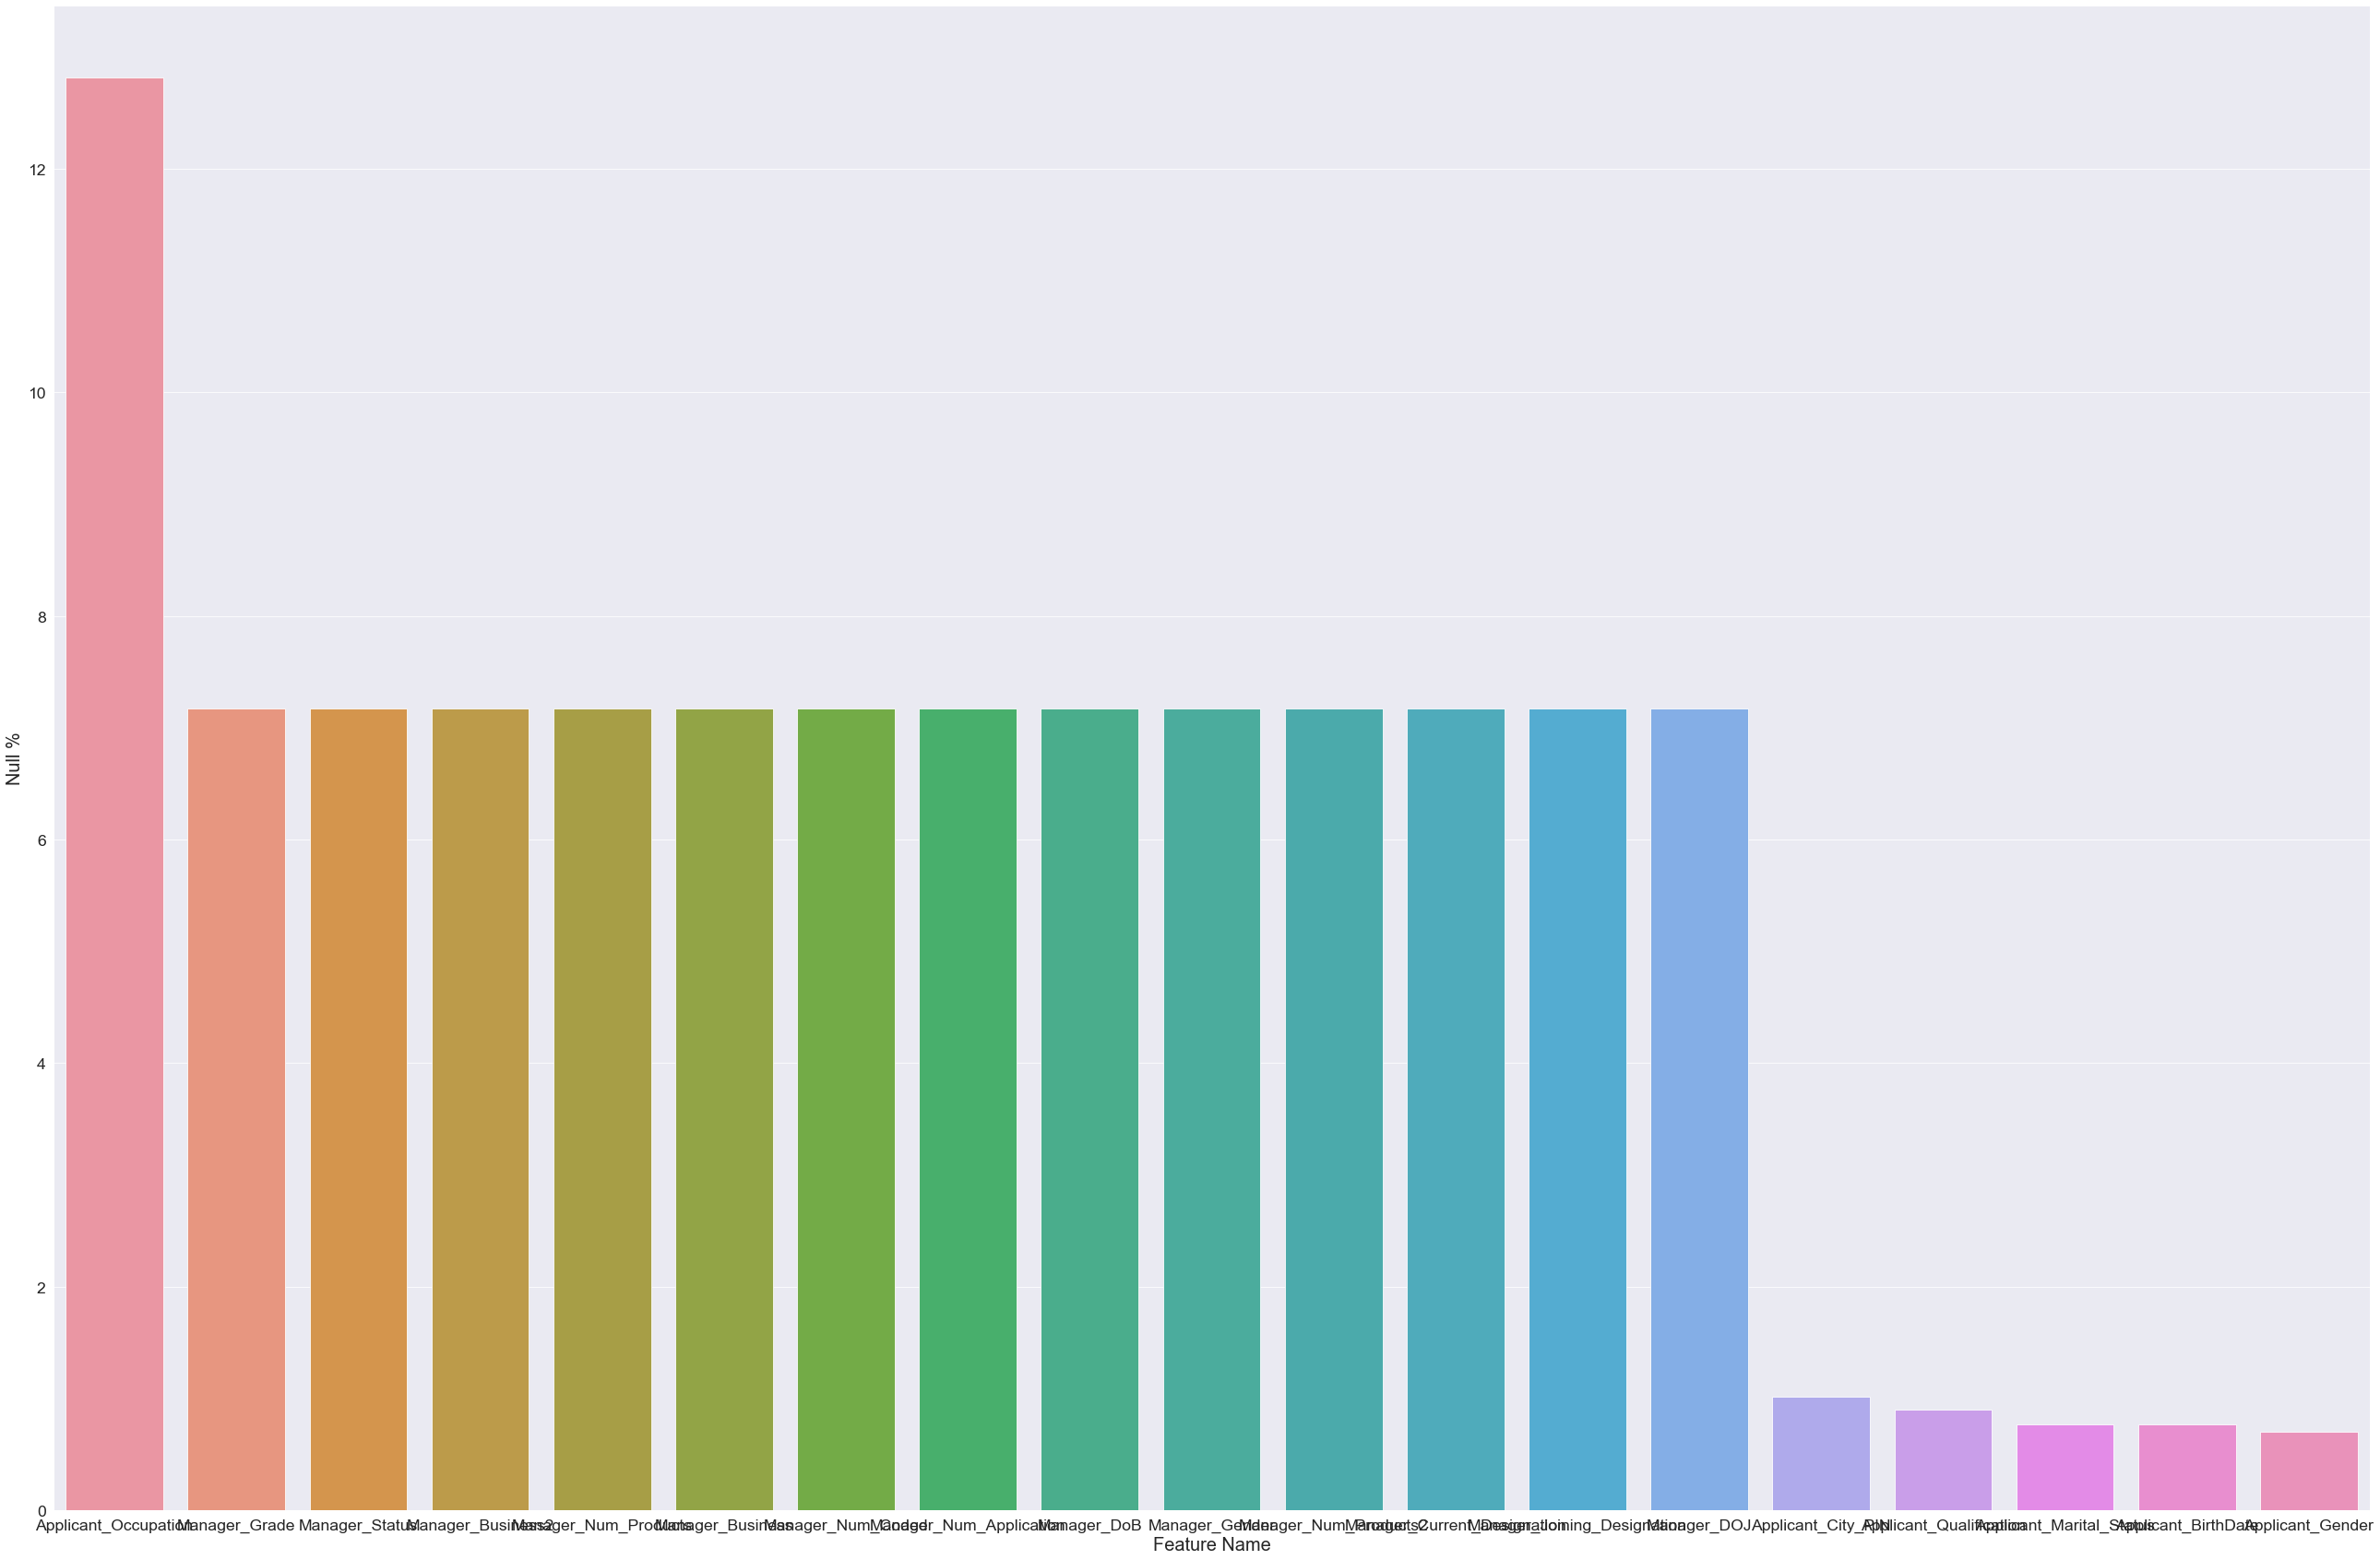

In [44]:
Null_in_train = np.sum(train.isnull())
null_col_train = Null_in_train.loc[(Null_in_train != 0)].sort_values(ascending=False)
null_col_train = null_col_train.apply(lambda x: 100*x/train.shape[0])

barplot_dim = (45,30)
ax = plt.subplots(figsize=barplot_dim)
sns.barplot(x=null_col_train.index, y=null_col_train)
sns.set_context("paper", font_scale=2) 
plt.ylabel("Null %", size=20);
plt.xlabel("Feature Name", size=20);
plt.show()

In [52]:
train['Applicant_City_PIN'].fillna('Details_Missing', inplace=True)
train['Applicant_Gender'].fillna('Details_Missing', inplace=True)
train['Applicant_BirthDate'].fillna('Details_Missing', inplace=True)
train['Applicant_Marital_Status'].fillna('Details_Missing', inplace=True)
train['Applicant_Occupation'].fillna('Details_Missing', inplace=True)
train['Applicant_Qualification'].fillna('Details_Missing', inplace=True)
train['Manager_DOJ'].fillna('Details_Missing', inplace=True)
train['Manager_Joining_Designation'].fillna('Details_Missing', inplace=True)
train['Manager_Current_Designation'].fillna('Details_Missing', inplace=True)
train['Manager_Grade'].fillna('Details_Missing', inplace=True)
train['Manager_Status'  ].fillna('Details_Missing', inplace=True)
train['Manager_Gender'].fillna('Details_Missing', inplace=True)
train['Manager_DoB'].fillna('Details_Missing', inplace=True)
train['Manager_Num_Application'].fillna('Details_Missing', inplace=True)
train['Manager_Num_Coded'].fillna('Details_Missing', inplace=True)
train['Manager_Business'].fillna('Details_Missing', inplace=True)
train['Manager_Business2'].fillna('Details_Missing', inplace=True)
train['Manager_Num_Products'].fillna('Details_Missing', inplace=True)
train['Manager_Num_Products2'].fillna('Details_Missing', inplace=True)


In [51]:
train.isnull().sum()

ID                             0
Office_PIN                     0
Application_Receipt_Date       0
Applicant_City_PIN             0
Applicant_Gender               0
Applicant_BirthDate            0
Applicant_Marital_Status       0
Applicant_Occupation           0
Applicant_Qualification        0
Manager_DOJ                    0
Manager_Joining_Designation    0
Manager_Current_Designation    0
Manager_Grade                  0
Manager_Status                 0
Manager_Gender                 0
Manager_DoB                    0
Manager_Num_Application        0
Manager_Num_Coded              0
Manager_Business               0
Manager_Num_Products           0
Manager_Business2              0
Manager_Num_Products2          0
Business_Sourced               0
dtype: int64

In [53]:
test['Applicant_City_PIN'].fillna('Details_Missing', inplace=True)
test['Applicant_Gender'].fillna('Details_Missing', inplace=True)
test['Applicant_BirthDate'].fillna('Details_Missing', inplace=True)
test['Applicant_Marital_Status'].fillna('Details_Missing', inplace=True)
test['Applicant_Occupation'].fillna('Details_Missing', inplace=True)
test['Applicant_Qualification'].fillna('Details_Missing', inplace=True)
test['Manager_DOJ'].fillna('Details_Missing', inplace=True)
test['Manager_Joining_Designation'].fillna('Details_Missing', inplace=True)
test['Manager_Current_Designation'].fillna('Details_Missing', inplace=True)
test['Manager_Grade'].fillna('Details_Missing', inplace=True)
test['Manager_Status'  ].fillna('Details_Missing', inplace=True)
test['Manager_Gender'].fillna('Details_Missing', inplace=True)
test['Manager_DoB'].fillna('Details_Missing', inplace=True)
test['Manager_Num_Application'].fillna('Details_Missing', inplace=True)
test['Manager_Num_Coded'].fillna('Details_Missing', inplace=True)
test['Manager_Business'].fillna('Details_Missing', inplace=True)
test['Manager_Business2'].fillna('Details_Missing', inplace=True)
test['Manager_Num_Products'].fillna('Details_Missing', inplace=True)
test['Manager_Num_Products2'].fillna('Details_Missing', inplace=True)

In [54]:
test.isnull().sum()

ID                             0
Office_PIN                     0
Application_Receipt_Date       0
Applicant_City_PIN             0
Applicant_Gender               0
Applicant_BirthDate            0
Applicant_Marital_Status       0
Applicant_Occupation           0
Applicant_Qualification        0
Manager_DOJ                    0
Manager_Joining_Designation    0
Manager_Current_Designation    0
Manager_Grade                  0
Manager_Status                 0
Manager_Gender                 0
Manager_DoB                    0
Manager_Num_Application        0
Manager_Num_Coded              0
Manager_Business               0
Manager_Num_Products           0
Manager_Business2              0
Manager_Num_Products2          0
dtype: int64

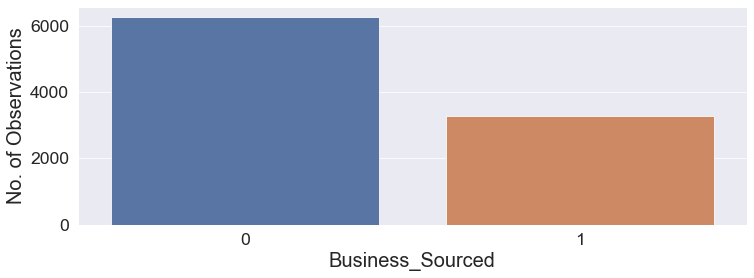

In [57]:
# class imbalance
ax = plt.subplots(figsize=(12, 4))
sns.set_style("darkgrid")
sns.countplot(x='Business_Sourced', data=train);
plt.ylabel("No. of Observations", size=20);
plt.xlabel("Business_Sourced", size=20);

In [59]:
train[train['Business_Sourced'] == 0].shape[0]

6260

In [60]:
train[train['Business_Sourced'] == 1].shape[0]

3267

In [58]:
imbalance_ratio = train[train['Business_Sourced'] == 0].shape[0]/train[train['Business_Sourced'] == 1].shape[0]
print(f'Imbalance ratio: {imbalance_ratio}')

Imbalance ratio: 1.9161310070400979


In [61]:
# feature value counts
train.nunique()

ID                             9527
Office_PIN                       98
Application_Receipt_Date        357
Applicant_City_PIN             2980
Applicant_Gender                  3
Applicant_BirthDate            5837
Applicant_Marital_Status          5
Applicant_Occupation              6
Applicant_Qualification          12
Manager_DOJ                     647
Manager_Joining_Designation       9
Manager_Current_Designation       6
Manager_Grade                    11
Manager_Status                    3
Manager_Gender                    3
Manager_DoB                    1246
Manager_Num_Application          18
Manager_Num_Coded                11
Manager_Business               3748
Manager_Num_Products             58
Manager_Business2              3744
Manager_Num_Products2            58
Business_Sourced                  2
dtype: int64

In [65]:
test.nunique()

ID                             5045
Office_PIN                       84
Application_Receipt_Date        143
Applicant_City_PIN             2065
Applicant_Gender                  3
Applicant_BirthDate            3793
Applicant_Marital_Status          5
Applicant_Occupation              6
Applicant_Qualification           9
Manager_DOJ                     466
Manager_Joining_Designation       7
Manager_Current_Designation       6
Manager_Grade                     8
Manager_Status                    3
Manager_Gender                    3
Manager_DoB                     896
Manager_Num_Application          18
Manager_Num_Coded                12
Manager_Business               1603
Manager_Num_Products             28
Manager_Business2              1583
Manager_Num_Products2            25
dtype: int64

In [63]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9527 entries, 0 to 9526
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID                           9527 non-null   object
 1   Office_PIN                   9527 non-null   int64 
 2   Application_Receipt_Date     9527 non-null   object
 3   Applicant_City_PIN           9527 non-null   object
 4   Applicant_Gender             9527 non-null   object
 5   Applicant_BirthDate          9527 non-null   object
 6   Applicant_Marital_Status     9527 non-null   object
 7   Applicant_Occupation         9527 non-null   object
 8   Applicant_Qualification      9527 non-null   object
 9   Manager_DOJ                  9527 non-null   object
 10  Manager_Joining_Designation  9527 non-null   object
 11  Manager_Current_Designation  9527 non-null   object
 12  Manager_Grade                9527 non-null   object
 13  Manager_Status               9527

In [67]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5045 entries, 0 to 5044
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID                           5045 non-null   object
 1   Office_PIN                   5045 non-null   int64 
 2   Application_Receipt_Date     5045 non-null   object
 3   Applicant_City_PIN           5045 non-null   object
 4   Applicant_Gender             5045 non-null   object
 5   Applicant_BirthDate          5045 non-null   object
 6   Applicant_Marital_Status     5045 non-null   object
 7   Applicant_Occupation         5045 non-null   object
 8   Applicant_Qualification      5045 non-null   object
 9   Manager_DOJ                  5045 non-null   object
 10  Manager_Joining_Designation  5045 non-null   object
 11  Manager_Current_Designation  5045 non-null   object
 12  Manager_Grade                5045 non-null   object
 13  Manager_Status               5045

In [ ]:
# Phik's correlation Graph
import phik
temp = [feature for feature in train.columns if feature not in ['ID']]
plt.figure(figsize=(10,10))
sns.heatmap(train[temp].phik_matrix(),annot=True)
plt.show()

interval columns not set, guessing: ['Office_PIN', 'Business_Sourced']
